Para este ejercicio, primero debe obtener los datos de **gapminder** de la URL de carpintería de software y cargarlos como marco de datos de pandas. Los datos de gapminder tienen información sobre la vida útil, la población y el pib de los países durante varios años.

Para eso use el siguiente código:

```
gapminder_csv_url ='http://bit.ly/2cLzoxH'
gapminder = pandas.read_csv(gapminder_csv_url)
print(gapminder.head(3))
```

A partir de esto, realice lo siguiente:


In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Muestra 2 decimal para números flotantes
pd.options.display.float_format = '{:.2f}'.format

In [67]:
gapminder_csv_url ='http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(gapminder_csv_url)
display(gapminder.head(3))

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.00,Asia,28.80,779.45
1,Afghanistan,1957,9240934.00,Asia,30.33,820.85
2,Afghanistan,1962,10267083.00,Asia,32.00,853.10


In [68]:
#gapminder.info()

1) Realice un resumen estadístico de sus datos.

In [69]:
gapminder.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00,1704.00,1704.00,1704.00
mean,1979.50,29601212.33,59.47,7215.33
std,17.27,106157896.75,12.92,9857.45
min,1952.00,60011.00,23.60,241.17
25%,1965.75,2793664.00,48.20,1202.06
50%,1979.50,7023595.50,60.71,3531.85
75%,1993.25,19585221.75,70.85,9325.46
max,2007.00,1318683096.00,82.60,113523.13


In [70]:
# Análisis de variables categóricas
def analizar_variables(datamart):
    dm_type = datamart.dtypes

    # Obtener lista de columnas de tipo object y category
    lista_object = list(dm_type[dm_type == 'object'].index)
    lista_object.extend(list(dm_type[dm_type == 'category'].index))

    if len(lista_object) > 0:
        # Mostrar .describe() de las variables
        display(datamart[lista_object].describe())

        # Mostrar .value_counts() de las variables
        for i in lista_object:
            display(pd.DataFrame({ i: datamart[i].value_counts(),
                                   '%': datamart[i].value_counts('%')}))

analizar_variables(gapminder)

,country,continent
count,1704,1704
unique,142,5
top,Afghanistan,Africa
freq,12,624


,country,%
country,,
Afghanistan,12,0.01
Pakistan,12,0.01
New Zealand,12,0.01
Nicaragua,12,0.01
Niger,12,0.01
...,...,...
Eritrea,12,0.01
Equatorial Guinea,12,0.01
El Salvador,12,0.01


,continent,%
continent,,
Africa,624,0.37
Asia,396,0.23
Europe,360,0.21
Americas,300,0.18
Oceania,24,0.01


2) Agrupe por la variable “año”. Comente respecto al resultado al usar groupby.

In [71]:
gapminder_g = gapminder.groupby("year")
gapminder_g.first()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,Afghanistan,8425333.00,Asia,28.80,779.45
1957,Afghanistan,9240934.00,Asia,30.33,820.85
1962,Afghanistan,10267083.00,Asia,32.00,853.10
1967,Afghanistan,11537966.00,Asia,34.02,836.20
1972,Afghanistan,13079460.00,Asia,36.09,739.98
1977,Afghanistan,14880372.00,Asia,38.44,786.11
1982,Afghanistan,12881816.00,Asia,39.85,978.01
1987,Afghanistan,13867957.00,Asia,40.82,852.40
1992,Afghanistan,16317921.00,Asia,41.67,649.34


In [72]:
#type(gapminder_g)

Al agrupar un Dataframe con **groupby** se obtiene un objeto de tipo *DataFrameGroupBy*. Este objeto contiene los datos en "paquetes" indexados con **year**.

3) Ahora obtenga la suma (la cantidad), la media y la mediana para cada grupo, es decir, por año.


In [73]:
# Cantidad por grupo
gapminder_g.count()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,142,142,142,142,142
1957,142,142,142,142,142
1962,142,142,142,142,142
1967,142,142,142,142,142
1972,142,142,142,142,142
1977,142,142,142,142,142
1982,142,142,142,142,142
1987,142,142,142,142,142
1992,142,142,142,142,142


4. ¿Sabías que en 1967 en Chile se inaugura el Aeropuerto Internacional
Arturo Merino Benítez? Usando estos datos se puede especificar un
año y obtener un marco de datos más pequeño para el año usando la función get_group().
 Por ejemplo, podemos obtener el marco de datos agrupados para el año 1967. Comenta tus resultados.  Escoge
otro año explicando el porqué de la elección y qué resultados
obtuviste.

In [74]:
y1967 = gapminder_g.get_group(1967)
y1967

,country,year,pop,continent,lifeExp,gdpPercap
3,Afghanistan,1967,11537966.00,Asia,34.02,836.20
15,Albania,1967,1984060.00,Europe,66.22,2760.20
27,Algeria,1967,12760499.00,Africa,51.41,3246.99
39,Angola,1967,5247469.00,Africa,35.98,5522.78
51,Argentina,1967,22934225.00,Americas,65.63,8052.95
...,...,...,...,...,...,...
1647,Vietnam,1967,39463910.00,Asia,47.84,637.12
1659,West Bank and Gaza,1967,1142636.00,Asia,51.63,2649.72
1671,Yemen Rep.,1967,6740785.00,Asia,36.98,862.44
1683,Zambia,1967,3900000.00,Africa,47.77,1777.08


In [75]:
y1967[y1967.country == "Chile"]

,country,year,pop,continent,lifeExp,gdpPercap
279,Chile,1967,8858908.00,Americas,60.52,5106.65


Se obtiene un *DataFrame* con los datos del año 1967.

En particular, Chile tenía una población de 8.858.908 personas, una expectativa de vida de 60.5 años y un ingreso per cápita de 	US$5,106.-

Escoge otro año explicando el porqué de la elección y qué resultados obtuviste.


In [76]:
y2007 = gapminder_g.get_group(2007)
y2007

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.00,Asia,43.83,974.58
23,Albania,2007,3600523.00,Europe,76.42,5937.03
35,Algeria,2007,33333216.00,Africa,72.30,6223.37
47,Angola,2007,12420476.00,Africa,42.73,4797.23
59,Argentina,2007,40301927.00,Americas,75.32,12779.38
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.00,Asia,74.25,2441.58
1667,West Bank and Gaza,2007,4018332.00,Asia,73.42,3025.35
1679,Yemen Rep.,2007,22211743.00,Asia,62.70,2280.77
1691,Zambia,2007,11746035.00,Africa,42.38,1271.21


In [77]:
y2007[y2007.country == "Chile"]

,country,year,pop,continent,lifeExp,gdpPercap
287,Chile,2007,16284741.00,Americas,78.55,13171.64


Se escogío el año 2007, porque es el último del dataset, para comparar la evolución de Chile en 40 años. Se aprecia que la población aumentó en un 84% y la expectativa de vida es 18 años más.

Ahora con los datos anteriores construya tablas pivote según las siguientes instrucciones:

1) Construya una tabla fijando “continent”, con las funciones vistas en clase


In [78]:
col = ['country', 'year']
val = ['pop', 'lifeExp', 'gdpPercap']

In [79]:
pivot_table_continent = gapminder.pivot_table(index="continent", columns=col, values=val)
display(pivot_table_continent)

gdpPercap                                                          \
country   Afghanistan                                                           
year             1952   1957   1962   1967   1972   1977   1982   1987   1992   
continent                                                                       
Africa            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Americas          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Asia           779.45 820.85 853.10 836.20 739.98 786.11 978.01 852.40 649.34   
Europe            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Oceania           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  ...        pop                                              \
country           ...   Zimbabwe                                               
year        1997  ...       1962       1967       1972       1977       1982   
continent         ...                                                          
Africa       NaN  ... 4277736.00 4995432.00 5861135.00 6642107.00 7636524.00   
Americas     NaN  ...        NaN        NaN        NaN        NaN        NaN   
Asia      635.34  ...        NaN        NaN        NaN        NaN        NaN   
Europe       NaN  ...        NaN        NaN        NaN        NaN        NaN   
Oceania      NaN  ...        NaN        NaN        NaN        NaN        NaN   

                                                                      
country                                                               
year            1987        1992        1997        2002        2007  
continent                                                             
Africa    9216418.00 10704340.00 11404948.00 11926563.00 12311143.00  
Americas         NaN         NaN         NaN         NaN         NaN  
Asia             NaN         NaN         NaN         NaN         NaN  
Europe           NaN         NaN         NaN         NaN         NaN  
Oceania          NaN         NaN         NaN         NaN         NaN  

[5 rows x 5112 columns]

2) Realice una tabla de doble entrada, fijando “continent” y “year”. Comente sus resultados.

In [80]:
ind = ['continent', 'year']
col = ['country']
val = ['pop', 'lifeExp', 'gdpPercap']
gap_c_y = gapminder.pivot(index=ind, columns=col, values=val)
gap_c_y

pop                                                 \
country        Afghanistan    Albania     Algeria      Angola   Argentina   
continent year                                                              
Africa    1952         NaN        NaN  9279525.00  4232095.00         NaN   
          1957         NaN        NaN 10270856.00  4561361.00         NaN   
          1962         NaN        NaN 11000948.00  4826015.00         NaN   
          1967         NaN        NaN 12760499.00  5247469.00         NaN   
          1972         NaN        NaN 14760787.00  5894858.00         NaN   
          1977         NaN        NaN 17152804.00  6162675.00         NaN   
          1982         NaN        NaN 20033753.00  7016384.00         NaN   
          1987         NaN        NaN 23254956.00  7874230.00         NaN   
          1992         NaN        NaN 26298373.00  8735988.00         NaN   
          1997         NaN        NaN 29072015.00  9875024.00         NaN   
          2002         NaN        NaN 31287142.00 10866106.00         NaN   
          2007         NaN        NaN 33333216.00 12420476.00         NaN   
Americas  1952         NaN        NaN         NaN         NaN 17876956.00   
          1957         NaN        NaN         NaN         NaN 19610538.00   
          1962         NaN        NaN         NaN         NaN 21283783.00   
          1967         NaN        NaN         NaN         NaN 22934225.00   
          1972         NaN        NaN         NaN         NaN 24779799.00   
          1977         NaN        NaN         NaN         NaN 26983828.00   
          1982         NaN        NaN         NaN         NaN 29341374.00   
          1987         NaN        NaN         NaN         NaN 31620918.00   
          1992         NaN        NaN         NaN         NaN 33958947.00   
          1997         NaN        NaN         NaN         NaN 36203463.00   
          2002         NaN        NaN         NaN         NaN 38331121.00   
          2007         NaN        NaN         NaN         NaN 40301927.00   
Asia      1952  8425333.00        NaN         NaN         NaN         NaN   
          1957  9240934.00        NaN         NaN         NaN         NaN   
          1962 10267083.00        NaN         NaN         NaN         NaN   
          1967 11537966.00        NaN         NaN         NaN         NaN   
          1972 13079460.00        NaN         NaN         NaN         NaN   
          1977 14880372.00        NaN         NaN         NaN         NaN   
          1982 12881816.00        NaN         NaN         NaN         NaN   
          1987 13867957.00        NaN         NaN         NaN         NaN   
          1992 16317921.00        NaN         NaN         NaN         NaN   
          1997 22227415.00        NaN         NaN         NaN         NaN   
          2002 25268405.00        NaN         NaN         NaN         NaN   
          2007 31889923.00        NaN         NaN         NaN         NaN   
Europe    1952         NaN 1282697.00         NaN         NaN         NaN   
          1957         NaN 1476505.00         NaN         NaN         NaN   
          1962         NaN 1728137.00         NaN         NaN         NaN   
          1967         NaN 1984060.00         NaN         NaN         NaN   
          1972         NaN 2263554.00         NaN         NaN         NaN   
          1977         NaN 2509048.00         NaN         NaN         NaN   
          1982         NaN 2780097.00         NaN         NaN         NaN   
          1987         NaN 3075321.00         NaN         NaN         NaN   
          1992         NaN 3326498.00         NaN         NaN         NaN   
          1997         NaN 3428038.00         NaN         NaN         NaN   
          2002         NaN 3508512.00         NaN         NaN         NaN   
          2007         NaN 3600523.00         NaN         NaN         NaN   
Oceania   1952         NaN        NaN         NaN         NaN         NaN   
          1957     

Se obtiene una tabla por continente y año, en las filas y país en las columnas. La información se ve más claramente, pero se aprecian muchos vacíos en donde los países no corresponden a los continentes.



3) Con las variables anteriores, obtenga el promedio de la variable “pop”.

In [81]:
#el promedio de la población por continente y año
gap_mean = gapminder.groupby(['year', 'continent'])['pop'].mean().reset_index()
display(gap_mean)

,year,continent,pop
0,1952,Africa,4570009.63
1,1952,Americas,13806097.84
2,1952,Asia,42283556.12
3,1952,Europe,13937361.53
4,1952,Oceania,5343003.00
5,1957,Africa,5093033.42
6,1957,Americas,15478156.64
7,1957,Asia,47356987.85
8,1957,Europe,14596345.03
9,1957,Oceania,5970988.00


4) Obtenga un gráfico de barras del punto 3, comente sus resultados.

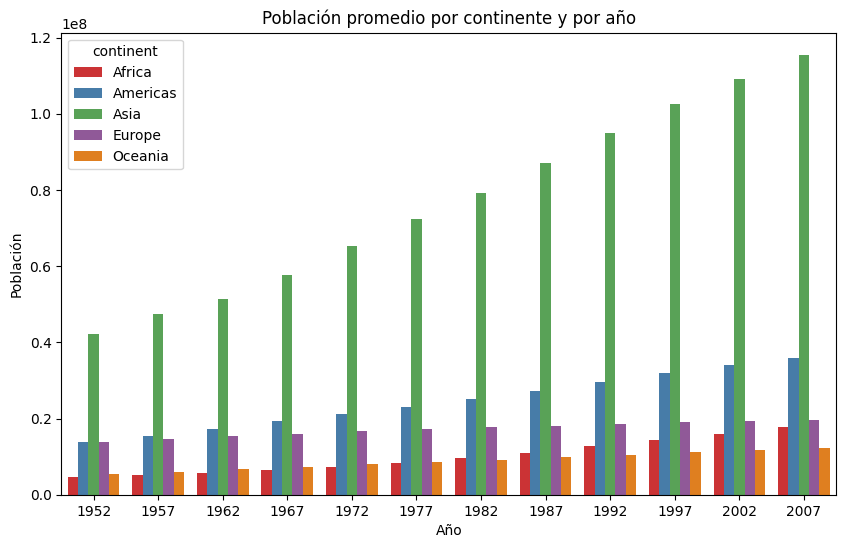

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y='pop', hue="continent", data=gap_mean, palette="Set1")
plt.title("Población promedio por continente y por año")
plt.xlabel("Año")
plt.ylabel("Población")
plt.show()

* Se aprecia que la población por continente aumenta con los años.
* La población más grande y con mayor crecimiento es la de Asia.
* Si bien América y Europa, en 1952 son similares, en 2007 la de América es casi el doble que Europa.
* En 1957, África era menor que Oceanía, pero en 2007, la supera notoriamente.